# Numerical Integration of Differential Equations

v33235cr<br>
University of Manchester  
April 2024

## 1.1 What are Analytical Methods?
Analytical methods, especially in the context of modeling physics problems involve differential equations and some information about the starting/ending conditions of a system. By solving these D.Es, we can obtain sets of equations that govern the functioning and evolution of the system. This allows physicists to study the system very closely and explore deviations of a physical experimental system from theory, which helps improve the model. However, a significant problem is that quite often not enough information is known about the system to obtain analytical solutions to it.

## 1.2 What are Numerical Methods?
Numerical methods are computational techniques used to approximate solutions to mathematical problems that are difficult or impossible to solve analytically. These methods are particularly valuable when dealing with problems involving complex equations, large datasets, or systems that cannot be solved with pen-and-paper methods. Numerical methods involve approximating continuous mathematical processes by discrete steps, making them suitable for implementation on computers. There are several known numerical methods, each with their own set of advantages like simplicity, time-complexity and accuracy.
# 2 The Simple Harmonic Oscillator
The simple harmonic oscillator is a fundamental quantum system that is widely used to model much more complex systems in quantum and statistical physics. A theoretical simple harmonic oscillator is well defined provided initial and systematic conditions are known.
## 2.1 Systematic conditions: 
$k$: Spring-Coefficient as described by Hooke's Law.

$m$: Mass of the oscillator.

$b$: Damping Coefficient, which determines how fast the system loses energy to the environment.
## 2.2 Initial Conditions:
$X_0$: Relative displacement of the mass w.r.t rest position.

$V_0$: Initial Velocity of the mass w.r.t rest position.
     
##  2.3 Analytical Solutions:
Given these initial conditions, the behaviour of the system for a given damping coefficient is predicted. The critical damping coefficient is given by:

$$b_{\text{crit}} = 2 \sqrt{mk}$$

The natural frequency of the system is given by:
$$\omega_0^2 = \frac{{k}}{{m}}$$

The equation of motion of the system is given by:
$$m \frac{{d^2x}}{{dt^2}} + b \frac{{dx}}{{dt}} + kx = 0 $$

The solutions to the equation of motion are:
$$x(t) = e^{-\frac{\gamma}{2}t}(A e^{i \omega t} + B e^{- i \omega t})\text{  if  } b \neq b_{cr}$$

$$x(t) = (A + Bt)e^{-\frac{\gamma}{2}t} \text{  if  } b = b_{cr}$$

Where
$$\gamma = \frac{b}{m}$$

We see that depending on the value of the damping coefficient, the system displays different kinds of time-evolutions.

###  2.3.1 No Damping $(b = 0)$:
Under this regime the system loses no energy to the environment during oscillation and hence will oscillate indefinitely with the same peak amplitude $C = \sqrt{A^2 + B^2}$

$$\omega_{osc} = \omega_0 $$

### 2.3.2 Under Damped $(b < b_{cr})$:
Under this regime the system will slowly lose energy over multiple oscillations. The number of oscillations is proportional to the ratio of \frac{b}{b_{cr}}.

$$\omega_{osc} = \sqrt{\omega_0^2 - \frac{\gamma^2}{4}}$$


### 2.3.3 Critically Damped $(b = b_{cr})$:
The system returns to its equilibrium position as quickly as possible without oscillating. There is no overshoot, meaning the displacement does not exceed the equilibrium position before settling. It reaches its equilibrium position in the shortest time compared to other damped oscillations.

### 2.3.4 Over Damped $(b > b_{cr})$:
Under this regime the system will initially appear to decelerate to 0 the fastest, but then subsequently take longer to reach equillibrium than critically damped system due to the excessive damping greatly opposing motion in both directions.

$$\omega_{osc} = \sqrt{\frac{\gamma^2}{4} - \omega_0^2}$$
Note that the terms inside the square root are swapped compared to under-damped. This reflects the fact that $\frac{b}{m} > \sqrt{\frac{k}{4m}}$  now.

## 2.4 Analytical Solution to driven/pushed harmonic oscillator:
When a sudden "push" force is applied to the system, either in the form of $F_{constant}$ between $t_{1} < t < t_{2}$ or a sinusoidal force $F_0 cos(\omega t + \phi)$, the solution to the differential equation in this region must include the particular integral to the equation 

$$m \frac{{d^2x}}{{dt^2}} + b \frac{{dx}}{{dt}} + kx = F $$

Solving for this region of applied force, we get particular integrals:
$F_{constant}$
$$ x_p = \frac{F_{constant}}{k}$$

and
$F_0 cos(\omega t + \phi)$
$$ x_p = \lambda cos(\omega t + \phi) + \mu sin(\omega t + \phi)$$
where 
$$ \lambda = \frac{-F_0b\omega}{b^2\omega^2 + (k-m\omega^2)^2} \text{  and  } \mu = \frac{F_0(k - m\omega^2)}{b^2\omega^2 + (k-m\omega^2)^2} $$
## 3 Modelling the system:
Let's now choose particular values for our system, and develop their analytical solutions.

In [1]:
## Initializing all libraries used in this notebook
import numpy as np
import matplotlib.pyplot as plt
import cmath
from scipy.signal import find_peaks
import ipywidgets as widgets
from IPython.display import display, clear_output

### 3.1 Constants:

In [2]:
X_0 = 0 # m
V_0 = -1 # ms^-1
SPRING_CONSTANT = 3.15 # Nm^-1
MASS = 2.14 # Kg
CRITICAL_DAMPING_COEFFICIENT = abs(2*np.sqrt(SPRING_CONSTANT*MASS)) # Kgs^-1
OMEGA_0 = abs(np.sqrt(SPRING_CONSTANT/MASS)) # Rads^-1

### 3.2 Implementing analytical solutions:

In [3]:
def damped_harmonic_oscillator(time, damping_coefficient, X_0 = X_0, V_0 = V_0):
    """
    Solve the damped harmonic oscillator analytically. 

    Parameters:
        time (float): The instance of time for which to compute the solution.
        damping_coefficient (float): The damping coefficient of the oscillator.

    Returns:
        array: The instantaneous displacement of the oscillator at instance of time.
    """
    if damping_coefficient == CRITICAL_DAMPING_COEFFICIENT:
        gamma = damping_coefficient / MASS  # Critical damping coefficient

    # Calculate constants A and B based on initial conditions
        A = X_0
        B = V_0 + (A / 2) * gamma

        # Compute positions using the critically damped solution
        x_time = (A + B * time) * np.exp(-gamma * time / 2)

        return x_time    
    
    else:
        # Determine constants A and B from initial conditions
        A = ((damping_coefficient / (2 * 1j * cmath.sqrt(4 * SPRING_CONSTANT * MASS -damping_coefficient ** 2)) + 1 / 2) * 
                    X_0 + V_0 * MASS / (cmath.sqrt(4 * SPRING_CONSTANT * MASS - damping_coefficient ** 2) * 1j))
        B = X_0 - A

        # Compute positions using the under/no damped solution
        x_time = np.exp(-damping_coefficient * time / (2 * MASS)) * (
                    A * np.exp(1j * cmath.sqrt(4 * SPRING_CONSTANT * MASS - damping_coefficient ** 2) * time / (2 * MASS))
                    + B * np.exp(-1j * cmath.sqrt(4 * SPRING_CONSTANT * MASS - damping_coefficient ** 2) * time / (2 * MASS)))
        
        return x_time 

### 3.3 Simulation of our analytical solutions:
Let's now simulate our harmonic oscillator by varying the damping co-efficient b over a range that includes all 4 regimes to better visualise the time evolution of the system. 

In [4]:
# Temporarily rounding off CRITICAL_DAMPING_COEFFICIENT to simplify system:
critical_damping_coefficient = round(CRITICAL_DAMPING_COEFFICIENT, 2)

def plot_simulation(damping_coefficient, run_time, x_start, v_start):
    time_array = np.arange(0, run_time, 0.01)
    plt.plot(time_array, damped_harmonic_oscillator(time_array, damping_coefficient, X_0 = x_start, V_0 = v_start).real)
    
    if damping_coefficient == critical_damping_coefficient:
        plt.title(f"Critically-Damped Oscillation b = {damping_coefficient/critical_damping_coefficient:.2f}"+"$b_{cr}$")
    if damping_coefficient == 0:
        plt.title(f"No Damping Oscillation b = {damping_coefficient/critical_damping_coefficient:.2f}"+"$b_{cr}$")
    if damping_coefficient> 0 and damping_coefficient < critical_damping_coefficient:
        plt.title(f"Under-Damped Oscillation b = {damping_coefficient/critical_damping_coefficient:.2f}"+"$b_{cr}$")
    if damping_coefficient > critical_damping_coefficient: 
        plt.title(f"Over-Damped Oscillation b = {damping_coefficient/critical_damping_coefficient:.2f}"+"$b_{cr}$")       
    
    plt.grid('True')
    plt.xlabel("Time (s)")
    plt.ylabel('Displacement x(t) (m)')
    plt.show()

# Initialize widgets to choose variables.
runtime_widget = widgets.FloatSlider(min=0, max=100, 
                                 step=1, description=r'$Run Time(s)$')
damping_coefficient_widget = widgets.FloatSlider(min=0, max=3*critical_damping_coefficient, 
                                 step=critical_damping_coefficient/64, description=r'$b(kgs^{-1})$')
x_start_widget = widgets.FloatSlider(min=-5, max=5, 
                                 step=1, description=r'$X_0(m)$')
v_start_widget = widgets.FloatSlider(min=-5, max=5, 
                                 step=1, description=r'$V_0 (ms^{-1})$')
# Display the simulation
print("Using the slider will make the code iterate through every step and show evolution but will take longer. \n"
    "You can also set damping_coefficient = 5.19 to view critical-damping by clicking on the displayed numbers.")
widgets.interact(plot_simulation, run_time = runtime_widget, damping_coefficient=damping_coefficient_widget,
                 x_start = x_start_widget, v_start = v_start_widget)

Using the slider will make the code iterate through every step and show evolution but will take longer. 
You can also set damping_coefficient = 5.19 to view critical-damping by clicking on the displayed numbers.


interactive(children=(FloatSlider(value=0.0, description='$b(kgs^{-1})$', max=15.57, step=0.08109375), FloatSl…

<function __main__.plot_simulation(damping_coefficient, run_time, x_start, v_start)>

## 4 Numerical Solutions
Now that we have well behaving analytical solutions, we will create numerical integration methods to solve our oscillator and then verify their accuracy using our analytical solutions. Different numerical integration methods use different alogrithms to achieve their goals, but all of them work under the fundamental principle of some step-wise incrementation $\textbf{h}$. In this section we will explore four such methods.
In all methods, the instantaneous acceleration is given by

$$a_{n} = \frac{{F_n}}{{m}} - \frac{{k}}{{m}} \cdot x_n - \frac{{b}}{{m}} \cdot v_n $$

as outlined earlier in analytical solutions section 2.3

In [5]:
def acceleration_function(displacement, velocity, force, damping_coefficient):
    """
    Calculate the acceleration of a harmonic oscillator based on instantaneous conditions.

    Parameters:
        displacement (float): The instantaneous displacement of the oscillator.
        velocity (float): The instantaneous velocity of the oscillator.
        force (float): The instantaneous external force applied to the oscillator.
        damping_coefficient (float): The damping coefficient of the oscillator.

    Returns:
        float: The instantaneous acceleration of the oscillator.
    """
    acceleration = force / MASS - (SPRING_CONSTANT / MASS) * displacement - (damping_coefficient / MASS) * velocity
    
    return acceleration

### 4.1 Euler Method:
The Euler method is a simple numerical technique used for solving ordinary differential equations (ODEs) numerically. It's a first-order method, that is, it uses the Taylor expansion to approximate successive terms to the first order of the time step $\textbf{h}$, meaning that its error is proportional to the step size. Despite its simplicity, the Euler method is widely used because of its ease of implementation.
The euler method takes the derivative/slope of a function at a point, multiplies it by the time step and then adds it to the current value to calculate the successive value.

$$y_{n+1} = y_n + h \cdot f(t_n, y_n)$$

In the case of our harmonic oscillator, this becomes:

$$x_{n+1} = x_n + h \cdot v_n $$
$$v_{n+1} = v_n + h \cdot a_n $$

In [6]:
def euler(total_time, hstep, force_data, damping_coefficient):
    """
    Perform the Euler method to solve the equation of motion for a harmonic oscillator.

    Parameters:
        total_time (float): The total time duration of the simulation.
        hstep (float): The time step size.
        force_data (array): The external force applied to the oscillator over time.
        damping_coefficient (float): The damping coefficient of the oscillator.

    Returns:
        tuple: Arrays containing the displacement and velocity of the oscillator over time.
    """
    # find number of iterations to reach total_time.
    n_step = int(total_time / hstep)
    
    # initialize empty arrays to to store data at each step, and then add initial conditions.
    displacement_data = np.empty(n_step)
    velocity_data = np.empty(n_step)   
    displacement_data[0] = X_0
    velocity_data[0] = V_0
    
    for step in range(n_step - 1):
        aceleration = acceleration_function(displacement_data[step], velocity_data[step], force_data[step], damping_coefficient)
        displacement_data[step + 1] = displacement_data[step] + velocity_data[step] * hstep
        velocity_data[step + 1] = velocity_data[step] + aceleration * hstep

    return displacement_data, velocity_data

### 4.2 Improved Euler Method:
The Improved-Euler method is similar in procedure to the Euler method, but includes the second order term in the Taylor expansion of successive terms. This improves accuracy with the trade-off of increased complexity.

$$x_{n+1} = x_n + h \cdot v_n + \frac{{a_n \cdot h^2}}{{2}}$$
$$v_{n+1} = v_n + h \cdot a_n $$

In [7]:
def improved_euler(total_time, hstep, force_data, damping_coefficient):
    """
    Perform the Improved Euler method to solve the equation of motion for a harmonic oscillator.

    Parameters:
        total_time (float): The total time duration of the simulation.
        hstep (float): The time step size.
        force_data (array): The external force applied to the oscillator over time.
        damping_coefficient (float): The damping coefficient of the oscillator.

    Returns:
        tuple: Arrays containing the displacement and velocity of the oscillator over time.
    """
    # find number of iterations to reach total_time.
    n_step = int(total_time / hstep)
    
    # initialize empty arrays to to store data at each step, and then add initial conditions.
    displacement_data = np.empty(n_step)
    velocity_data = np.empty(n_step)
    displacement_data[0] = X_0
    velocity_data[0] = V_0
    
    for step in range(n_step - 1):
        acceleration = acceleration_function(displacement_data[step],velocity_data[step], force_data[step], damping_coefficient)
        displacement_data[step + 1] = displacement_data[step] + velocity_data[step] * hstep + acceleration * (hstep ** 2 / 2)
        velocity_data[step + 1] = velocity_data[step] + acceleration * hstep

    return displacement_data, velocity_data

### 4.3 Verlet Method:
Verlet's method involves taking the centred derivative of a function:

$$f'(x) = \lim_{{h \to 0}} \frac{f(x + h) - f(x - h)}{2h}$$

and then performing taylor expansion on ${f(x + h)}$ and ${f(x - h)}$ and simplifying it to get

$$f'(x) = \frac{f(x + h) - f(x - h)}{2h} - \frac{1}{6}h^2f'''(x) $$
$$f''(x) = \frac{f(x + h) - 2f(x) + f(x - h)}{h^2} + \frac{1}{12}h^2f''''$$
For our system, we are only concerned with time-evolution of displacement, so we can simply for x to get:

$$x_{i+1} = A \cdot x_i + B \cdot x_{i-1}$$

where 

$$ A = \frac{2(2m - kh^2)}{D} \text{  and  } B = \frac{bh - 2m}{D}$$

$$D = 2m + bh$$

Note that this method is not self starting since it requires information about $x_1$ and $x_{0}$ to start calculating $x_2$ and so on, but we only know $x_{0}$. So another method has to performed initially to find $x_1$. For this report, the aforementioned Improved-Euler method was used for this. For improved accuracy, we will calculate upto $x_{T/h+1}$ and then take values upto $x_{T/h}$

In [8]:
def verlet(total_time, hstep, force_function, damping_coefficient):
    """
    Perform the Verlet method to solve the equation of motion for a harmonic oscillator. Uses the Improved-Euler method 
    to find displacement at second instance of time to initiate the algorithm.

    Parameters:
        total_time (float): The total time duration of the simulation.
        hstep (float): The time step size.
        force_data (array): The external force applied to the oscillator over time.
        damping_coefficient (float): The damping coefficient of the oscillator.

    Returns:
        array: The displacement of the oscillator over time.
    """
    # find number of iterations to reach total_time, calculate for an additional step to complete the loop.
    n_step = int(total_time / hstep)+1
    
    # initialize empty arrays to to store data at each step, and then add initial conditions.
    displacement_data = np.empty(n_step)
    displacement_data[0] = X_0
    
    # finding co-efficients as outlined in algorithm above.
    D = 2 * MASS + damping_coefficient * hstep
    A = 2 * (2 * MASS - SPRING_CONSTANT * hstep ** 2) / D
    B = (damping_coefficient * hstep - 2 * MASS) / D
    
    # finding x_1 using improved_euler method.
    a_0 = acceleration_function(X_0, V_0, force_data[0], damping_coefficient)
    displacement_data[1] = displacement_data[0] + V_0 * hstep + a_0 * (hstep ** 2 / 2)
    
    for step in range(1, n_step - 2):
        displacement_data[step + 1] = A * displacement_data[step] + B * displacement_data[step - 1]
        
    # return all displacement values except for the last extra value
    return displacement_data[:-1], None

### 4.4 Euler-Cromer Method
The Euler-Cromer Method attempts to find the velocity at a successive step, and then use the new velocity to find the change in displacement from the current step. The algorithm is of the form:
$$v_{n+1} = v_n + h \cdot a_n $$
$$x_{n+1} = x_n + h \cdot v_{n+1} $$

The Euler-Cromer method is symplectic, which means it is energy preserving. Over the course of an oscillation the numerical method will have added/removed a net 0 from the system. This means its system energy oscillates around the average system energy across the simulation, and is its most useful functionality.

In [9]:
def euler_cromer(total_time, hstep, force_data, damping_coefficient):
    """
    Perform the Euler-Cromer method to solve the equation of motion for a harmonic oscillator.

    Parameters:
        total_time (float): The total time duration of the simulation.
        hstep (float): The time step size.
        force_data (array): The external force applied to the oscillator over time.
        damping_coefficient (float): The damping coefficient of the oscillator.

    Returns:
        tuple: Arrays containing the displacement and velocity of the oscillator over time.
    """
    # find number of iterations to reach total_time.
    n_step = int(total_time / hstep)
    
    # initialize empty arrays to to store data at each step, and then add initial conditions.
    displacement_data = np.empty(n_step)
    velocity_data = np.empty(n_step)
    
    displacement_data[0] = X_0
    velocity_data[0] = V_0
    
    for step in range(n_step - 1):
        velocity_data[step + 1] = (velocity_data[step] - hstep * (SPRING_CONSTANT * displacement_data[step]
                                                                  / MASS + damping_coefficient * velocity_data[step] / MASS))
        displacement_data[step + 1] = displacement_data[step] + hstep * velocity_data[step + 1]

    return displacement_data, velocity_data

### 4.5 Runge-Kutta 4 Method
The Runge-Kutta 4, or rk4 for short, is a numerical method that finds successive values of a function by finding intermediate values between them in a similar way to euler's method using data on the derivative at the current step and the time to the next step. It then gives a weightage to each intermediate value to calculate the final value. The algorithm is essentially, for a function $y(t)$ if $\frac{dy}{dt} = f(t, y) $ and $y(t_0) = y_0$ are known:

\begin{align*}
k_1 &= f(t_n, y_n) \\
k_2 &= f\left(t_n + \frac{h}{2}, y_n + \frac{h}{2}k_1\right) \\
k_3 &= f\left(t_n + \frac{h}{2}, y_n + \frac{h}{2}k_2\right) \\
k_4 &= f(t_n + h, y_n + hk_3) \\
k &= \frac{1}{6}(k_1 + 2k_2 + 2k_3 + k_4) \\
y_{n+1} &= y_n + hk
\end{align*}

performing this algorithm on the displacement and velocity of the system simultaneously allows us to accurately numerically integrate the system, albeit at a high time complexity.

In [10]:
def runge_kutta4(total_time, hstep, force_data, damping_coefficient):
    """
    Perform the fourth-order Runge-Kutta method to solve the equation of motion for a harmonic oscillator. Calls on 
    rk4_stepwise at each step to perform simulation.

    Parameters:
        total_time (float): The total time duration of the simulation.
        hstep (float): The time step size.
        force_data (array): The external force applied to the oscillator over time.
        damping_coefficient (float): The damping coefficient of the oscillator.

    Returns:
        tuple: Arrays containing the displacement and velocity of the oscillator over time.
    """
    # find number of iterations to reach total_time.
    n_step = int(total_time / hstep)
    
    # initialize empty arrays to to store data at each step, and then add initial conditions.
    displacement_data = np.empty(n_step)
    velocity_data = np.empty(n_step)
    displacement_data[0] = X_0
    velocity_data[0] = V_0
    
    # perform the runge-kutta 4 integration at each step by using the algorithm performed by the function rk4_stepwise
    for step in range(n_step - 1):
        displacement_data[step + 1], velocity_data[step + 1] = rk4_stepwise(displacement_data[step], velocity_data[step],
                                                                               force_data[step], hstep, damping_coefficient)
    return displacement_data, velocity_data


def rk4_stepwise(displacement, velocity, force, hstep, damping_coefficient):
    """
    Perform a single step of the fourth-order Runge-Kutta method for a harmonic oscillator.

    Parameters:
        displacement (float): The instantaneous displacement of the oscillator.
        velocity (float): The instantaneous velocity of the oscillator.
        force (float): The instantaneous external force applied to the oscillator.
        hstep (float): The time step size.
        damping_coefficient (float): The damping coefficient of the oscillator.

    Returns:
        tuple: The new displacement and velocity of the oscillator after the RK4 step.
    """
    (rk1x, rk1v) = (velocity, acceleration_function(displacement, velocity, force, damping_coefficient))
    
    (rk2x, rk2v) = (velocity + 0.5 * rk1v * hstep, acceleration_function
                    (displacement + 0.5 * rk1x * hstep, velocity + 0.5 * rk1v * hstep, force, damping_coefficient))
    (rk3x, rk3v) = (velocity+ 0.5 * rk2v * hstep,acceleration_function
                    (displacement + 0.5 * rk2x * hstep, velocity + 0.5 * rk2v * hstep, force, damping_coefficient))
    (rk4x, rk4v) = (velocity + rk3v * hstep,
                    acceleration_function(displacement + rk3x * hstep, velocity + rk3v * hstep, force, damping_coefficient))
    
    # Combine intermediate steps according to their weightage to find next step value.
    new_displacement = displacement + (1 / 6) * (rk1x + 2 * rk2x + 2 * rk3x + rk4x) * hstep
    new_velocity = velocity + (1 / 6) * (rk1v + 2 * rk2v + 2 * rk3v + rk4v) * hstep

    return new_displacement, new_velocity

## 5 Compare the methods
Now that the numerical methods have been outlined and developed, let's compare them against our analytical solution. We shall first visualize the predicted oscillations for an un-damped and critically-damped oscillator for a total simulation run time of 50 seconds.

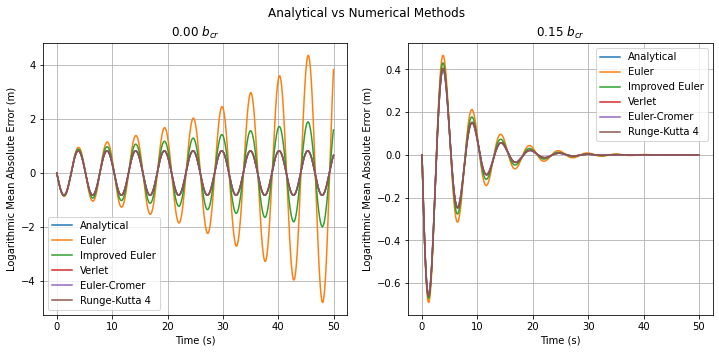

In [11]:
# test two cases of damping coefficient
damping_coefficient_list = np.array([0, .8])

# plot parameters
fig,(ax1,ax2) = plt.subplots(1,2, figsize=(12,5))
ax_list = [ax1,ax2]
plt.rcParams.update({'font.size': 14})
plt.style.use('default')
fig.suptitle('Analytical vs Numerical Methods')

# run the simulation for 50 seconds with step size 0.05 s
simulation_time = 50
h_step = 0.05

# calculate time evolution of displacement using each method and plot
for i,(damping_coefficient,axs) in enumerate(zip(damping_coefficient_list,ax_list)):
    force_data = np.zeros(int(simulation_time/h_step))
    analytical_x = damped_harmonic_oscillator(np.arange(0, simulation_time, h_step), damping_coefficient).real
    euler_x, _  = euler(simulation_time, h_step, force_data, damping_coefficient)
    improved_euler_x, _ = improved_euler(simulation_time, h_step, force_data, damping_coefficient)
    verlet_x, _ = verlet(simulation_time, h_step, force_data, damping_coefficient)
    euler_cromer_x, _ = euler_cromer(simulation_time, h_step, force_data, damping_coefficient)
    rk4_x, _ = runge_kutta4(simulation_time, h_step, force_data, damping_coefficient)

    data_set = [analytical_x,euler_x,improved_euler_x,verlet_x,euler_cromer_x,rk4_x]
    for data in data_set:
        axs.plot(np.arange(0, simulation_time, h_step),data,label= f'{data}')
        axs.set_xlabel('Time (s)')
        axs.set_ylabel('Logarithmic Mean Absolute Error (m)')
    axs.set_title(rf'{damping_coefficient/CRITICAL_DAMPING_COEFFICIENT:1.2f}'+' $b_{cr}$')

    # add legend with labels for each diff array
    axs.legend(['Analytical','Euler', 'Improved Euler', 'Verlet', 'Euler-Cromer', 'Runge-Kutta 4'])
    axs.grid(True)
plt.show()

### 5.1 Interpreting of the plots:
In the undamped harmonic oscillator, we expect the maximum amplitde/systematic energy to remain constant throughout.The numerical methods however show varying degrees of increase in these parameters. Verlet, rk4 and Euler-Cromer show very small, almost no notable deviation. The Euler-Cromer method has the added advantage of being symplectic. The improved-euler method deviates from the analytical solution much slower than the Euler method, as expected.

In the under-damped harmonic oscillator, a very similar conclusion can be drawn, although its important to note that the absolute errors are much smaller towards the end of the simulation for the two Euler methods compared to the un-damped scenario.

### 5.2 Effect of Time-step on accuracy of the numerical methods:
So far we have studied two cases of damping co-efficients for a fixed time step 0.05 seconds. We will now explore a more detailed comparison between the numerical methods and the analytical method. We begin by running the simulations for a range of time steps and damping co-efficients, and for each case, find the absolute difference in calculated displacement from the analytical method's prediction at each instance of time, and find the mean of this absolute difference. This gives a concrete way of quantifying how much a numerical method deviates.

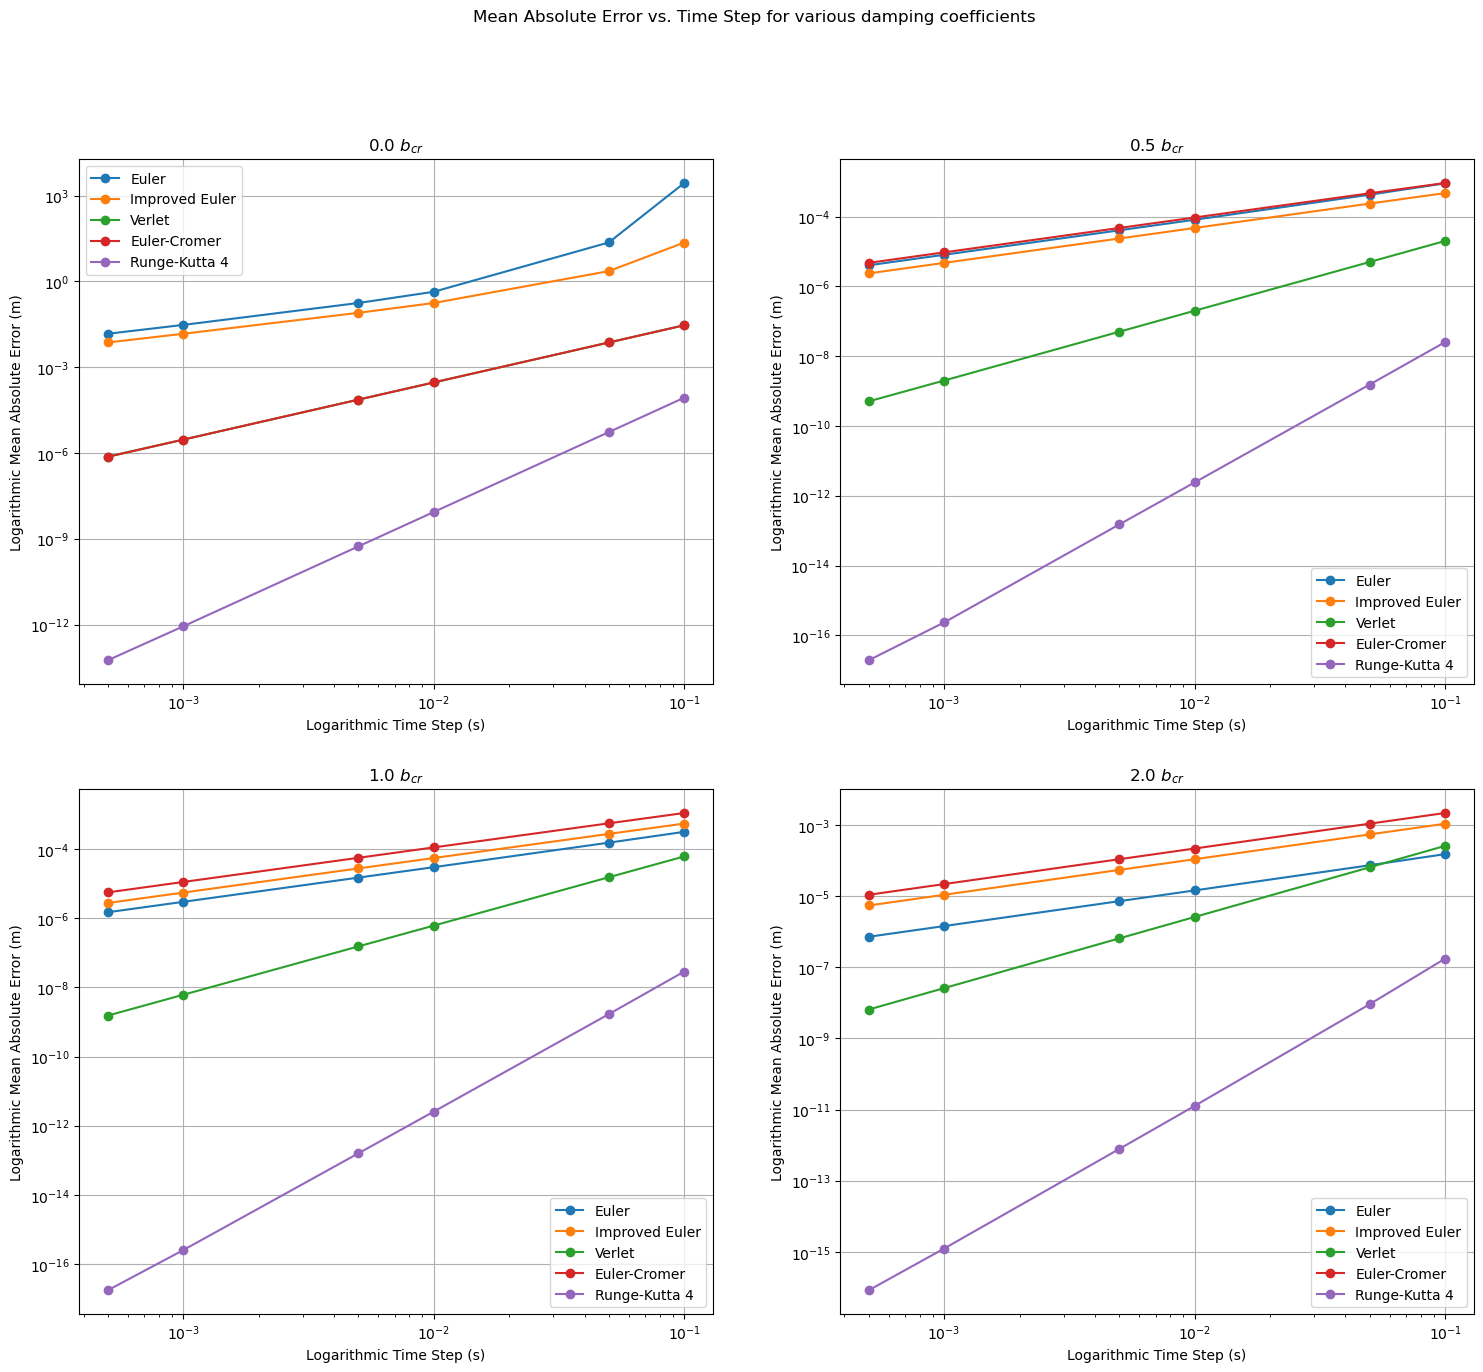

In [12]:
# Create a list of arbitrary damping coefficients and time steps. 
damping_coefficient_list = np.array([0, 1/2, 1, 2]) * CRITICAL_DAMPING_COEFFICIENT
h_step_list = [0.1, 0.05, 0.01, 0.005, 0.001, 0.0005]

# Setting run time. For the above conditions 100 seconds is long enough to find accurate MAEs for each method quickly 
# as the oscillator dies out by then if b != 0.
total_time = 150

#Plot Parameters
fig,([ax1,ax2],[ax3,ax4]) = plt.subplots(2, 2, figsize=(18, 15))
axs_list = [ax1,ax2,ax3,ax4]
plt.rcParams.update({'font.size': 14})
plt.style.use('default')
fig.suptitle('Mean Absolute Error vs. Time Step for various damping coefficients')
ax_count = 0

# iterate through every time step for every damping coefficient.
for damping_coefficient in damping_coefficient_list:
    euler_MAE, improved_euler_MAE, verlet_MAE, euler_cromer_MAE, rk4_MAE = [], [], [], [], []
    
    for h_step in h_step_list:

        # create a 0 force array as unforced oscillations are being studied, to meet function parameters.
        force_data = np.zeros(int(total_time/h_step))
        force_verlet_data = np.zeros(int(total_time/h_step)+1) # extra step for verlet due to method

        # collect the displacement data for all methods.
        analytical_x_data = damped_harmonic_oscillator(np.arange(0, total_time, h_step), damping_coefficient).real
        euler_x_data, _  = euler(total_time, h_step, force_data, damping_coefficient)
        improved_euler_x_data, _ = improved_euler(total_time, h_step, force_data, damping_coefficient)
        verlet_x_data, _ = verlet(total_time, h_step, force_data, damping_coefficient)
        euler_cromer_x_data, _ = euler_cromer(total_time, h_step, force_data, damping_coefficient)
        rk4_x_data, _ = runge_kutta4(total_time, h_step, force_data, damping_coefficient)

        # find the mean absolute difference between the numerical and analytical method over the whole simulation.
        euler_MAE.append(np.mean(np.abs(euler_x_data - analytical_x_data)))
        improved_euler_MAE.append(np.mean(np.abs(improved_euler_x_data - analytical_x_data)))
        
        verlet_MAE.append(np.mean(np.abs(verlet_x_data - analytical_x_data)))
        euler_cromer_MAE.append(np.mean(np.abs(euler_cromer_x_data - analytical_x_data)))
        rk4_MAE.append(np.mean(np.abs(rk4_x_data - analytical_x_data)))

    # Store all of the mean absolute error data for each time step for each method.
    MAE_dataset = [euler_MAE, improved_euler_MAE, verlet_MAE, euler_cromer_MAE, rk4_MAE]  

    # Plotting
    for MAE_data in MAE_dataset:
        axs_list[ax_count].plot(h_step_list, MAE_data, marker='o')
    
    axs_list[ax_count].set_xscale('log')
    axs_list[ax_count].set_yscale('log')

    axs_list[ax_count].set_xlabel('Logarithmic Time Step (s)')
    axs_list[ax_count].set_ylabel('Logarithmic Mean Absolute Error (m)')
    axs_list[ax_count].set_title(rf'{damping_coefficient/CRITICAL_DAMPING_COEFFICIENT:1.1f}'+' $b_{cr}$')

    # Add legend with labels for each diff array
    axs_list[ax_count].legend(['Euler', 'Improved Euler', 'Verlet', 'Euler-Cromer', 'Runge-Kutta 4'])
    axs_list[ax_count].grid(True)
    ax_count += 1
plt.show()


As expected, the fourth-order Runge-Kutta method is significantly more accurate than all the other methods at all time steps tested.

## 6 Forced oscillations:

### 6.1.1 Sudden constant push 
We will now investigate the changes that occur to our isolated harmonic oscillator when a sudden force $F_{constant}$ is applied from $t_{1} < t < t_{2}$. We will explore how the system responds if the force applied is along/against the direction of motion, and to the magnitude of velocity. As our Runge-Kutta 4 method has shown to be extremely accurate, we will only be plotting those data points using $h_{step} = 0.01$ for time efficiency.

We can also update our analytical method, even if we won't be using it. Due to the implementation of our method, this is simple as adding $\frac{F_{constant}}{k}$ to our result.

In [13]:
def forced_damped_harmonic_oscillator(time, damping_coefficient, force, X_0 = X_0, V_0 = V_0):
    """
    Solve the forced damped harmonic oscillator analytically. Can take in an array of force_array that is zero 
    everywhere except t_1 < t < t_2 where it is constant and adjust accordingly.

    Parameters:
        time (float): The instance of time for which to compute the solution.
        damping_coefficient (float): The damping coefficient of the oscillator.
        force (float): The instantaneous force applied to the system at time.
    Returns:
        array: The instantaneous displacement of the oscillator at instance of time.
    """
    return damped_harmonic_oscillator(time, damping_coefficient, X_0 = X_0, V_0 = V_0).real + (force/SPRING_CONSTANT)

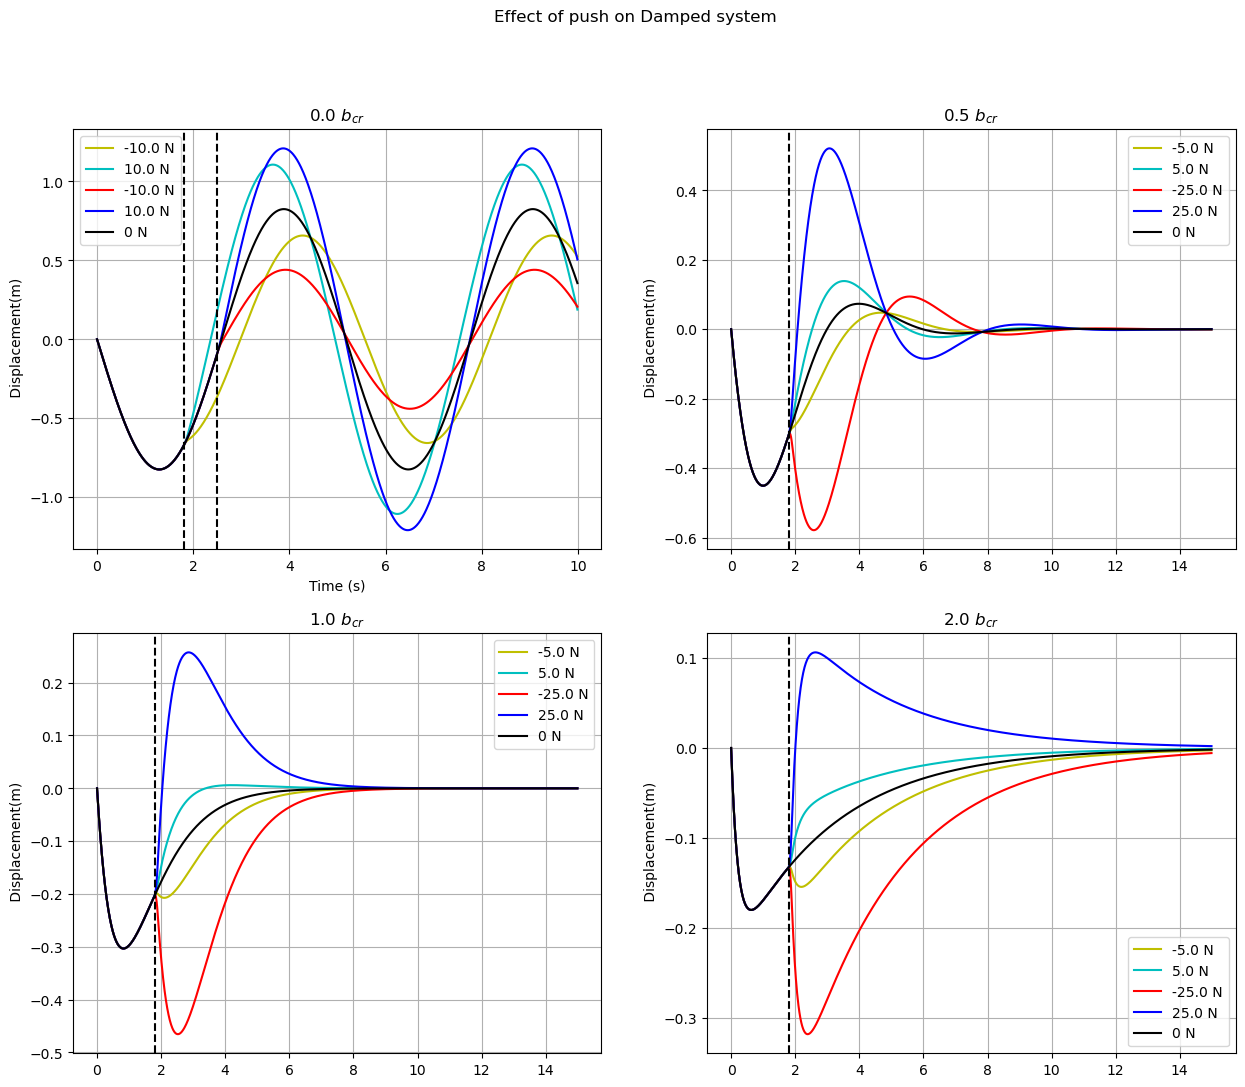

In [14]:
def push_function(total_time, hstep, force, push_start, push_end, damping_coefficient): 
    """
    Numerically integrate a system subjected to a force over a specific time interval using rk4 method.

    Parameters:
    - hstep (float): The time step size.
    - force (float): The constant push force applied to the system.
    - push_start (float): The start time of the force application.
    - push_end (float): The end time of the force application.

    Returns:
    - displacement_data (array-like): The displacement data of the system over time.

    Note:
    - This function assumes that the total time and damping coefficient are defined elsewhere.
    - It uses the Runge-Kutta 4th order method for numerical integration.
    """
    # find number of iterations to reach each time point.
    n_step = int(total_time / hstep)
    push_start_step = int(push_start / hstep)
    push_end_step = int(push_end / hstep)    
    
    # initialize zero force array then add top hat force constant
    force_array = np.zeros(n_step)
    force_array[push_start_step:push_end_step] = force
    
    # find displacement evolution when force function acts on system
    displacement_data, _ = runge_kutta4(total_time, hstep, force_array, damping_coefficient)
    return displacement_data

# plot parameters
fig,([ax1,ax2],[ax3,ax4]) = plt.subplots(2,2, figsize=(15,12))
ax_list = [ax1,ax2,ax3,ax4]
plt.rcParams.update({'font.size': 14})
plt.style.use('default')
fig.suptitle('Effect of push on Damped system')

# fixing time step to 0.01s for all future cases.
h_step = 0.01 # s

# damping coefficient test cases
damping_coefficient_list = np.array([0, 0.5, 1, 2]) * CRITICAL_DAMPING_COEFFICIENT
for i,(damping_coefficient,axs) in enumerate(zip(damping_coefficient_list,ax_list)):  
    if i == 0:
        # setting unique parameters for no damping case and plotting.
        run_time = 10
        F_cons = 10
        time_array = np.arange(0,run_time,0.01)
        
        axs.plot(time_array,push_function(run_time, h_step,-F_cons,1.8, 1.9, damping_coefficient),'y',label=f'{-F_cons:.1f} N')
        axs.plot(time_array,push_function(run_time, h_step,F_cons,1.8, 1.9,damping_coefficient),'c', label=f'{F_cons:.1f} N')
        axs.plot(time_array,push_function(run_time, h_step,-F_cons,2.5,2.6, damping_coefficient),'r',label=f'{-F_cons:.1f} N')
        axs.plot(time_array,push_function(run_time, h_step,F_cons,2.5,2.6,damping_coefficient),'b', label=f'{F_cons:.1f} N')
        axs.axvline(x=1.8, color='k', linestyle='--')
        axs.axvline(x=2.5, color='k', linestyle='--')

        axs.set_xlabel('Time (s)')
    if i != 0:
        # setting parameters for all other cases and plotting.
        run_time = 15
        F_cons = 5
        time_array = np.arange(0,run_time,0.01)
        axs.plot(time_array,push_function(run_time,h_step,-F_cons,1.8, 1.9, damping_coefficient),'y',label=f'{-F_cons:.1f} N')
        axs.plot(time_array,push_function(run_time,h_step,F_cons,1.8, 1.9,damping_coefficient),'c', label=f'{F_cons:.1f} N')
        axs.plot(time_array,push_function(run_time,h_step,-5*F_cons,1.8,1.9,damping_coefficient),'r',label=f'{-5*F_cons:.1f} N')
        axs.plot(time_array,push_function(run_time,h_step,5*F_cons,1.8,1.9,damping_coefficient),'b', label=f'{5*F_cons:.1f} N')
        axs.axvline(x=1.8, color='k', linestyle='--')
    
    # no external force case.
    axs.plot(time_array,push_function(run_time, h_step, 0, 2, 2.1, damping_coefficient),"k", label='0 N')
    
    axs.set_ylabel(' Displacement(m)')
    axs.set_title(rf'{damping_coefficient/CRITICAL_DAMPING_COEFFICIENT:1.1f}'+' $b_{cr}$')
    axs.grid(True)
    axs.legend()

plt.show()



### 6.1.2 Interpreting the plots
#### Undamped:
In the zero damping case, we know that total energy is conserved throughout, and can be calculated from the maximum amplitude via $ E = \frac{1}{2}kA_0^2$. We expect the force applied on the system to do some work, and this is given by $F \cdot d$ where $d$ is the distance travelled by the mass during the duration of the force application. Thus, we expect force applied in the direction of motion to add energy to the system and force applied in the direction opposite to motion to do work AGAINST the system.

As expected, in the plot of un-damped oscillation, the positive forces increase our system's energy and the negative forces decrease our energy. We also note that if the force(s) is applied when $x=0$, our velocity is at its maximum. This means the system travels more distance during the duration of force being applied, hence more work will be done. Like-wise, the red plot shows higher energy than the yellow plot, blue plot shows lower energy than cyan plot.
#### Under-damped:
In this case force applied along the direction of motion increases the degree of overshoot while negative force decreases it. Regardless however, both cases increase the effective time of oscillation of the system until it reaches equilibrium.

#### Critical and Over Damped:
In these 2 cases, the magnitude of the force changes the time at which the system effectively reaches equilibrium, but the direction does not have an effect on this.


### 6.2.1 Sinusoidal Force
We will now investigate what happens when a sinusoidal force of the form $ F = F_0 \cdot sin(\omega t)$ is applied on the system, starting from $t = t_{start}$. Theoretically, we expect a transient period in oscillation due to the super-position of the original oscillation and the force. This transient period should disappear when the original oscillation dies out.

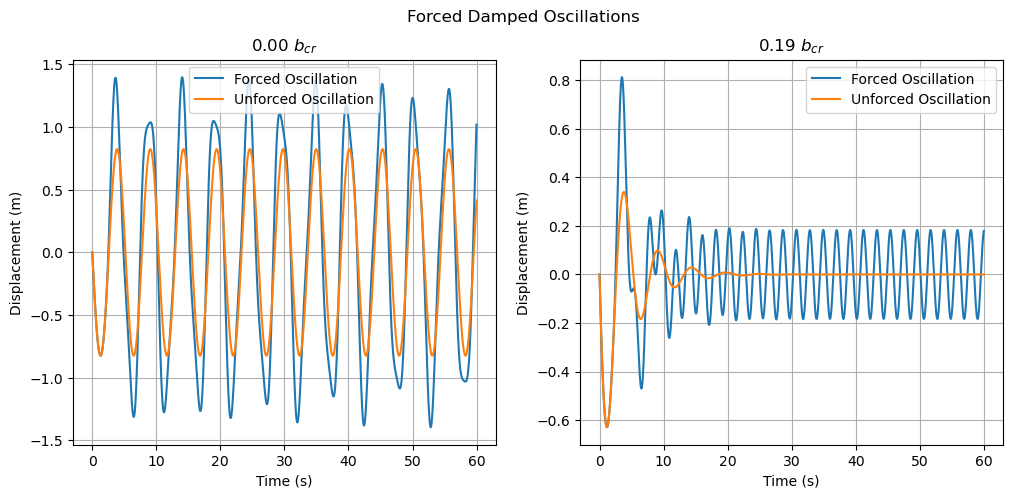

In [15]:
def sinusoidal_driving_force_function(hstep, omega, F_0, start_time, total_time, damping_coefficient):
    """
    Calculate the response of a harmonic oscillator to a sinusoidal driving force using rk4 method.

    Parameters:
        hstep (float): The time step size.
        omega (float): The angular frequency of the sinusoidal force.
        F_0 (float): The amplitude of the sinusoidal force.
        start_time (float): The time at which the force starts acting.
        total_time (float): The total time duration of the simulation.
        damping_coefficient (float): The damping coefficient of the oscillator.

    Returns:
        array: The displacement of the oscillator over time.
    """
    # find number of iterations to reach each time point.
    n_step = int(total_time/hstep)
    start_step = int(start_time/hstep)
    
    # create a zero force array up until t_start, then add F(t) array to it for the remainder of the simulation
    force_data = np.zeros(start_step)
    force_data = np.append(force_data, F_0*np.sin(omega * np.arange(0, total_time-start_time, hstep)))
    displacement_data, _ = runge_kutta4(total_time, hstep, force_data, damping_coefficient)
    return displacement_data

# set constants for simulation
omega = 3 # rads^-1
F_0 = 3 # N
start_time = 3 # driving force starting time
simulation_time = 60 # s
# damping coefficient test cases
damping_coefficient_list = np.array([0, 1])

# plot parameters
fig,(ax1,ax2) = plt.subplots(1,2, figsize=(12,5))
ax_list = [ax1,ax2]
plt.rcParams.update({'font.size': 14})
plt.style.use('default')
fig.suptitle('Forced Damped Oscillations')

# plotting the driven damped harmonic oscillator numerical method and the analytical method for the same damped oscillator
# but without force, to compare their evolution.
for i,(damping_coefficient,axs) in enumerate(zip(damping_coefficient_list,ax_list)):
    time_array = np.arange(0, simulation_time, h_step)
    displacement_data = sinusoidal_driving_force_function(h_step, omega, F_0, 2, simulation_time, damping_coefficient)
    axs.plot(time_array,displacement_data,label= 'Forced Oscillation')
    axs.plot(time_array,damped_harmonic_oscillator(time_array, damping_coefficient).real, label = "Unforced Oscillation")
    axs.set_xlabel('Time (s)')
    axs.set_ylabel('Displacement (m)')
    axs.set_title(rf'{damping_coefficient/CRITICAL_DAMPING_COEFFICIENT:1.2f}'+' $b_{cr}$')
    axs.grid(True)
    axs.legend()
plt.show()

We can see that for an undamped oscillation, we obtain the sum of original oscillation and the sinusoidal driving force.
In the damped case we observe a transient period until $t \sim 20$ seconds, after which the original oscillation reaches equilibrium and the oscillation of the system is solely determined by the sinusoidal force as expected.
The amplitude of the wave is analytically given by:
$$A(\omega) = \frac{F_0}{m\sqrt{(\omega_0^2-\omega^2)^2 + \omega^2\gamma^2}}$$


### 6.2.2 Real-Time simulation of sinusoidal force

In [16]:
# Temporarily rounding off CRITICAL_DAMPING_COEFFICIENT to simplify system:
critical_damping_coefficient = round(CRITICAL_DAMPING_COEFFICIENT, 2)

def sine_force_simulation(omega,F_0, damping_coefficient, run_time, start_time):
    displacement_data = sinusoidal_driving_force_function(h_step, omega, F_0, start_time, run_time, damping_coefficient)
    time_array = np.arange(0, run_time, 0.01)
    plt.plot(time_array, displacement_data)
    plt.grid('True')
    plt.xlabel("Time (s)")
    plt.ylabel('Displacement x(t) (m)')
    plt.show()

# Initialize widgets to choose variables.
runtime_widget = widgets.FloatSlider(min=1, max=200, 
                                 step=1, description=r'Run Time')
start_time_widget = widgets.FloatSlider(min=0, max=200, 
                                 step=1, description=r'Force Start Time')
damping_coefficient_widget = widgets.FloatSlider(min=0, max=3*critical_damping_coefficient, 
                                 step=critical_damping_coefficient/64, description=r'$b$')
F_0_widget = widgets.FloatSlider(min=-5, max=5, 
                                 step=0.1, description=r'$F_0$')
omega_widget = widgets.FloatSlider(min=0.1, max=5, 
                                 step=0.1, description=r'$\omega$')
# Display the simulation
print("Using the slider will make the code iterate through every step and show evolution but will take longer.")
widgets.interact(sine_force_simulation, run_time = runtime_widget, damping_coefficient=damping_coefficient_widget,
                 F_0 = F_0_widget, omega = omega_widget, start_time = start_time_widget)

Using the slider will make the code iterate through every step and show evolution but will take longer.


interactive(children=(FloatSlider(value=0.1, description='$\\omega$', max=5.0, min=0.1), FloatSlider(value=0.0…

<function __main__.sine_force_simulation(omega, F_0, damping_coefficient, run_time, start_time)>

## 7 Resonance:
We will now investigate the resonance effect. Resonance occurs when the frequency of the external force approaches the natural frequency of the oscillator $\omega_{force} = \omega_0 $. At resonance, the amplitude of oscillation increases significantly because the driving force reinforces the oscillations of the system. Following the equation above, we get 

$$A(\omega_0) = \frac{F_0}{m\omega_0\gamma}$$

$$A(0) = \frac{F_0}{k}$$

and 

$$tan(\delta) = \frac{\gamma\omega}{\omega_0^2 - \omega^2}$$

Where $\delta$ is the phase difference between the superposed oscillation and the natural oscillation.

Thus the peak amplitude is solely dependent on the damping coefficient of the system, so we will explore this phenomenon with our numerical method. We will select our damping coefficients such that, the transient period will fade away before $t = 100$ seconds, for the sake of time complexity. 
We will use a simple peak finding algorithm to find the peak amplitude of the driven system, but a more complex and time intensive algorithm is also presented if the user wishes to explore $ b \sim b_{cr} $ where infnite resonance occurs.

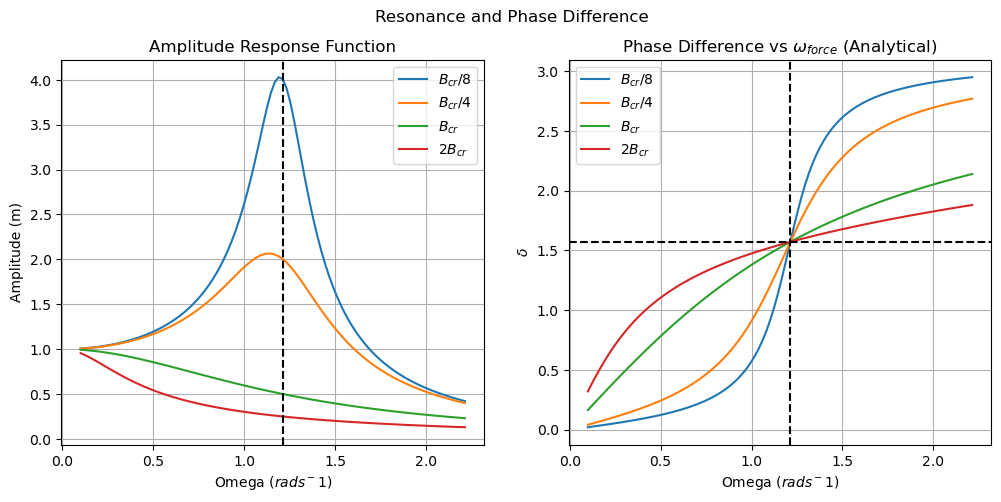

In [19]:
def analytical_amplitude_phase(omega, damping_coefficient, F_0):
    """
    Calculate the amplitude and phase difference of a driven harmonic oscillator analytically.

    Parameters:
        omega (float): The angular frequency of the driving force.
        damping_coefficient (float): The damping coefficient of the oscillator.
        F_0 (float): The amplitude of the driving force.

    Returns:
        float: The amplitude of the oscillator's motion.
    """
    gamma = damping_coefficient / MASS
    amplitude_omega = F_0 / (MASS * np.sqrt(((OMEGA_0**2 - omega ** 2) ** 2 + (omega * gamma) ** 2)))
    phase_difference = np.arctan((gamma*omega)/(OMEGA_0**2-omega**2))
    negative_phases = phase_difference < 0
    phase_difference[negative_phases] += np.pi
    return amplitude_omega, phase_difference 

def maximum_amplitude_finder(hstep, omega, F_0, run_time, damping_coefficient):
    """
    Find the amplitude of the last successful peak oscillation.

    Parameters:
        hstep (float): The time step size.
        omega (float): The angular frequency of the driving force.
        F_0 (float): The amplitude of the driving force.
        run_time (float): The total time duration of the simulation.
        damping_coefficient (float): The damping coefficient of the oscillator.

    Returns:
        float: The amplitude of the peak oscillation.
    """
    gamma = damping_coefficient/2
    displacement_data = sinusoidal_driving_force_function(hstep, omega, F_0, 0, run_time, damping_coefficient)
    peaks, _ = find_peaks(displacement_data)

    return displacement_data[peaks[-1]]

# damping_coefficient for test cases
resonance_test_cases = np.array([1/8,1/4,1,2]) * CRITICAL_DAMPING_COEFFICIENT

# plot parameters
fig,(ax1,ax2) = plt.subplots(1,2, figsize=(12,5))
plt.rcParams.update({'font.size': 14})
plt.style.use('default')
fig.suptitle('Resonance and Phase Difference')
labels = ['$B_{cr}/8$', '$B_{cr}/4$', '$B_{cr}$', '$2B_{cr}$']

# simulation constants
F_0 = SPRING_CONSTANT # (k) N   numerically equal to spring constant of system.
simulation_time = 100 # s
for damping_coefficient in resonance_test_cases:
    # calculate amplitude and phase difference between (0.1 and w_0 +1) rads^-1
    omega_array = np.linspace(0.1,OMEGA_0+1,100)
    amplitude_dataset, phase_dataset = [],[]
    for omega in omega_array:
        amplitude_data = maximum_amplitude_finder(h_step,omega,F_0,simulation_time,damping_coefficient)
        amplitude_dataset.append(amplitude_data)
    _, analytical_phase_difference = analytical_amplitude_phase(omega_array,damping_coefficient,F_0)
    
    #plotting
    ax1.plot(omega_array,amplitude_dataset)
    ax2.plot(omega_array,analytical_phase_difference)
    ax1.set_xlabel('Omega $(rads^-1)$')
    ax1.set_ylabel('Amplitude (m)')
    ax1.set_title(rf'Amplitude Response Function')
    
    ax2.set_xlabel('Omega $(rads^-1)$')
    ax2.set_ylabel('$\delta$')
    ax2.set_title("Phase Difference vs $\omega_{force}$ (Analytical)")
    ax1.grid(True)
    ax2.grid(True)
    ax1.legend(labels)
    ax2.legend(labels)
ax1.axvline(x= OMEGA_0, color='k', linestyle='--')
ax2.axvline(x= OMEGA_0, color='k', linestyle='--')
ax2.axhline(y= np.pi/2, color='k', linestyle='--')
plt.show()

In [18]:
def stable_amplitude_peak(hstep, omega, F_0, start_time, run_time, tolerance, iterations, damping_coefficient):
    """
    Find the stable amplitude of peak oscillation within a tolerance. Reruns the simulation
    with higher run times if stable peaks are not found. Exits if unsuccessful after 10 loops. Extremely high
    time complexity, only presented as an option when accuracy is crucial.

    Parameters:
        hstep (float): The time step size.
        omega (float): The angular frequency of the driving force.
        F_0 (float): The amplitude of the driving force.
        start_time (float): The time at which the force starts acting.
        run_time (float): The total time duration of the simulation.
        tolerance (float): The tolerance for amplitude difference between iterations.
        iterations (int): The current iteration count.
        damping_coefficient (float): The damping coefficient of the oscillator.

    Returns:
        float: The stable amplitude of peak oscillation.
    """
    if iterations == 11:
        return 0
    
    total_time = run_time
    displacement_data = sinusoidal_driving_force_function(hstep, omega, F_0, start_time, total_time, damping_coefficient)
    peaks, _ = find_peaks(displacement_data)
    
    if np.abs(displacement_data[peaks[-1]] - displacement_data[peaks[-2]]) <= tolerance:
        valid_amplitude = displacement_data[peaks[-1]]
        phase_difference = (peaks[-1] - peaks[-2])*hstep
        return valid_amplitude
    else:
        return stable_amplitude_peak(hstep, omega, F_0, start_time, total_time * MULTIPLIER, 
                                     tolerance, iterations + 1, damping_coefficient)
